In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
con = pd.read_csv('./congestion.csv')
sen = pd.read_csv('./senior.csv')

In [3]:
con.head(2)

,조사연도,조사일자,호선,역명,방향,06시 이전,06~07,07~08,08~09,09~10,...,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23시 이후
0,2017,주말,1호선,동대문,상선,4.8,7.8,11.0,10.55,14.05,...,35.7,40.45,39.70,36.5,30.25,23.7,24.05,26.7,28.45,15.6
1,2017,주말,1호선,동대문,하선,8.4,9.1,9.1,18.45,24.35,...,45.1,41.35,45.75,39.0,23.85,17.1,11.65,14.3,10.70,6.4


In [4]:
sen.head(2)

,일자,역번호,역명,구분,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,요일,호선
0,2021-07-01,150,서울역,승차,77,71.0,134.0,214.0,213.0,323.0,...,441.0,419.0,283.0,196.0,119.0,129.0,52.0,21,평일,1호선
1,2021-07-01,150,서울역,하차,65,235.0,249.0,265.0,361.0,419.0,...,370.0,240.0,184.0,128.0,87.0,63.0,37.0,16,평일,1호선


# 노인 승하차 인원 평일/주말 비교

In [5]:
sen = sen.dropna(axis=0).reset_index(drop=True)

In [6]:
sen.columns

Index(['일자', '역번호', '역명', '구분', '06시이전', '06시-07시', '07시-08시', '08시-09시',
       '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시',
       '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시',
       '21시-22시', '22시-23시', '23시이후', '요일', '호선'],
      dtype='object')

In [7]:
g_col=['역명', '구분', '06시이전', '06시-07시', '07시-08시', '08시-09시',
       '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시',
       '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시',
       '21시-22시', '22시-23시', '23시이후', '요일', '호선']

In [8]:
w_h = sen[sen['구분']=='승차'][g_col].groupby('요일').mean().reset_index()

In [9]:
w_h

,요일,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후
0,주말,38.040458,42.789012,42.481453,61.037698,87.936023,102.541536,103.663024,112.867206,112.694899,114.022725,111.919159,104.2291,84.696714,63.113586,44.238174,31.751805,22.414073,11.504745,2.661398
1,평일,59.692358,69.645780,82.675791,103.697193,128.495771,143.123560,147.952119,147.441009,154.406072,169.335561,185.592109,167.3417,136.835501,97.161271,63.718398,43.166257,30.277495,15.185507,3.503365


Text(0.5, 1.0, '시간대에 따른 노인 승차 인원 수')

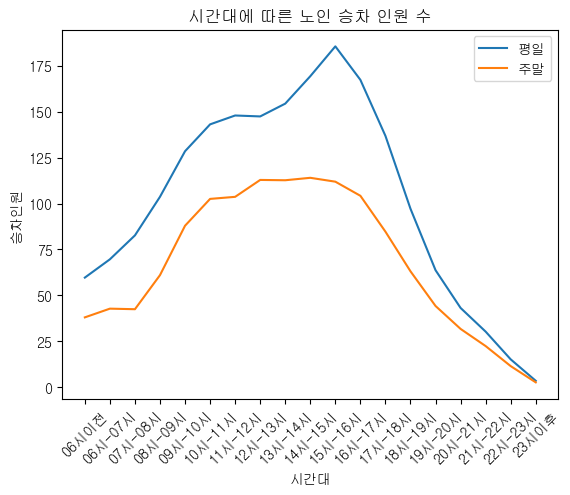

In [10]:
# 평일과 주말 노인 승차자 수 비교
w=w_h[w_h['요일']=='평일'].T.iloc[1:,:]
h=w_h[w_h['요일']=='주말'].T.iloc[1:,:]
plt.plot(w[1].index,w[1].values)
plt.plot(h[0].index,h[0].values)
plt.xlabel('시간대')
plt.ylabel('승차인원')
plt.xticks(rotation=45)
plt.legend(['평일','주말'])
plt.title('시간대에 따른 노인 승차 인원 수')

### 시간대에 따른 노인 승차 인원 수 그래프 해석
- 주말보다 평일에 노인 승차자 수가 많음
- 따라서 다른 시간대보다 출퇴근시간대에 많은 지 확인해 볼 필요 있음

# 평일이 더 많으면 출퇴근시간대와 다른 시간대 비교

In [11]:
# 출근 시간대(7~9)/퇴근 시간대(6~8) 전체 이용객과 노인승차자 수 비교
con_g = con[con['조사일자']=='평일'][['역명','호선','07~08', '08~09']]
con_l = con[con['조사일자']=='평일'][['역명','호선','18~19', '19~20']]
sen_g = sen[(sen['요일']=='평일') & (sen['구분']=='승차')][['역명','호선','07시-08시', '08시-09시']]
sen_l = sen[(sen['요일']=='평일') & (sen['구분']=='승차')][['역명','호선','18시-19시', '19시-20시']]

In [12]:
c = con.groupby(['역명','호선']).max().reset_index().mean()[1:,]
s = sen.groupby(['역명','호선']).mean().reset_index().mean()[1:,]

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\56996769.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  c = con.groupby(['역명','호선']).max().reset_index().mean()[1:,]
C:\Users\songh\AppData\Local\Temp\ipykernel_14488\56996769.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s = sen.groupby(['역명','호선']).mean().reset_index().mean()[1:,]


In [13]:
c.index = s.index

Text(0.5, 1.0, '시간대에 따른 혼잡도와 노인 승차자 수')

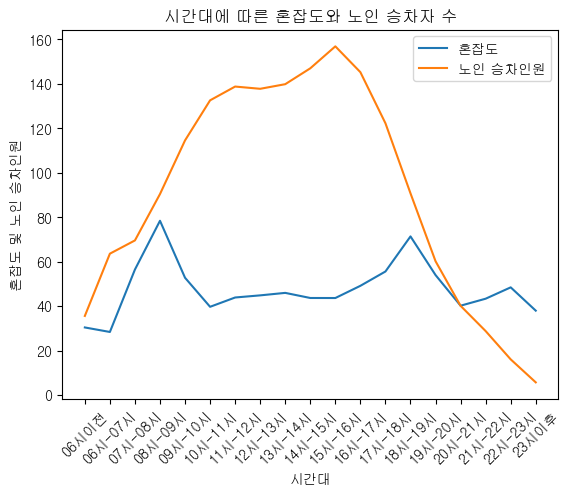

In [14]:
# 시간대별 혼잡도와 노인 승차자 수 비교
plt.plot(c.index,c.values)
plt.plot(s.index,s.values)
plt.xlabel('시간대')
plt.ylabel('혼잡도 및 노인 승차인원')
plt.xticks(rotation=45)
plt.legend(['혼잡도','노인 승차인원'])
plt.title('시간대에 따른 혼잡도와 노인 승차자 수')

### 시간대에 따른 혼잡도와 노인 승차자 수 그래프 해석
- 혼잡도는 출퇴근 시간에 집중적으로 높은 반면, 노인 승차인원 수는 출근시간부터 꾸준히 증가하여 오후 3~4시에 가장 많음
- 노인 승차인원 수가 출퇴근 시간대 혼잡도에 크게 영향을 주지 않을 것이라고 예상됨

# 노인 승차 인원 많은 역의 시간대별 이용객 수 그래프

In [15]:
sen_t = sen[(sen['구분']=='승차') & (sen['요일']=='평일')]

In [16]:
sen_t['총 승차인원'] = sen_t[['06시이전', '06시-07시', '07시-08시', '08시-09시',
       '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시',
       '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시',
       '21시-22시', '22시-23시', '23시이후']].sum(axis=1)

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\4044593954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sen_t['총 승차인원'] = sen_t[['06시이전', '06시-07시', '07시-08시', '08시-09시',


In [17]:
sen_t = sen_t[['역명','호선','총 승차인원']].groupby(['역명','호선']).mean().reset_index()

In [18]:
sen_t.sort_values(by='총 승차인원', ascending=False).head(5)

,역명,호선,총 승차인원
235,종로3가,1호선,7681.305439
233,제기동,1호선,7291.799163
238,종로5가,1호선,7172.824268
254,청량리,1호선,6763.439331
195,연신내,3호선,6755.405858


In [19]:
con_t = con[(con['역명'].isin(['종로3가','제기동','종로5가','청량리','연신내'])) & (con['조사일자']=='평일')]

In [20]:
con_t

,조사연도,조사일자,호선,역명,방향,06시 이전,06~07,07~08,08~09,09~10,...,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23시 이후
1122,2017,평일,1호선,제기동,상선,7.6,8.60,10.70,17.85,19.75,...,28.50,32.50,35.00,52.95,66.10,50.40,30.85,40.75,44.50,20.90
1123,2017,평일,1호선,제기동,하선,16.6,22.40,52.80,80.20,38.80,...,31.30,33.80,35.25,42.00,30.95,17.30,12.25,14.15,13.95,10.10
1126,2017,평일,1호선,종로3가,상선,6.3,12.55,22.60,41.75,36.15,...,39.20,41.15,39.85,45.30,72.00,50.75,33.10,42.25,42.90,21.55
1127,2017,평일,1호선,종로3가,하선,11.5,16.10,39.25,72.65,35.20,...,35.85,39.35,45.30,48.70,53.95,31.30,20.50,22.50,24.75,14.20
1128,2017,평일,1호선,종로5가,상선,5.8,10.15,18.30,31.05,28.45,...,37.95,40.55,39.90,47.45,76.90,53.65,34.90,42.80,46.25,22.15
1129,2017,평일,1호선,종로5가,하선,13.5,19.00,44.90,81.35,38.20,...,39.50,43.40,47.30,51.85,53.65,28.80,19.60,20.80,23.70,14.75
1130,2017,평일,1호선,청량리,상선,7.2,6.80,8.95,14.70,13.60,...,23.95,28.70,30.10,47.05,59.80,45.00,27.75,35.55,33.70,22.60
1131,2017,평일,1호선,청량리,하선,17.1,21.55,59.05,76.15,38.10,...,26.05,26.90,27.45,35.80,24.40,15.95,11.20,13.20,13.45,9.05
1284,2017,평일,3호선,연신내,상선,33.0,15.20,14.25,15.60,11.10,...,23.20,35.70,33.45,38.85,56.85,48.10,34.60,32.35,33.70,23.50
1285,2017,평일,3호선,연신내,하선,20.1,30.95,64.70,83.15,52.45,...,23.90,28.70,27.45,20.50,20.25,14.50,9.50,10.00,11.50,6.55


In [21]:
con_t = con_t.groupby(['호선','역명','조사연도']).max().reset_index().groupby(['호선','역명']).mean().reset_index()
con_t = con_t[con_t['호선'].isin(['1호선','3호선'])].T

In [22]:
con_t.drop(columns=5, inplace=True)

In [23]:
con_t

,0,1,2,3,4
호선,1호선,1호선,1호선,1호선,3호선
역명,제기동,종로3가,종로5가,청량리,연신내
조사연도,2019.0,2019.0,2019.0,2019.0,2019.0
06시 이전,16.666667,10.9,12.566667,17.066667,26.566667
06~07,19.816667,13.6,16.1,19.133333,30.083333
07~08,43.483333,33.933333,38.566667,47.366667,61.65
08~09,67.066667,62.433333,68.516667,63.4,83.5
09~10,36.233333,33.4,36.2,34.933333,48.866667
10~11,29.116667,26.166667,28.366667,27.533333,40.183333
11~12,23.833333,30.083333,26.9,22.65,31.316667


Text(0.5, 1.0, '노인 승차자 수 많은 역 top5의 시간대별 혼잡도')

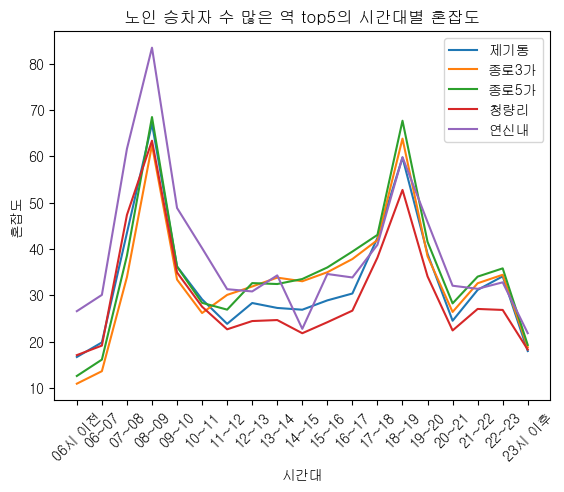

In [24]:
# 노인 승차자 수 많은 역 top5의 시간대별 혼잡도
for i in range(5):
    plt.plot(con_t.iloc[3:,:].index, con_t.iloc[3:,i].values)
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend(['제기동','종로3가','종로5가','청량리','연신내'])
plt.title('노인 승차자 수 많은 역 top5의 시간대별 혼잡도')

### 노인 승차자 수 많은 역 top5의 시간대별 혼잡도 그래프 해석
- 노인 승차 수가 많은 5개의 역만 보았을 때도 출퇴근시간대의 혼잡도가 눈에 띄게 높음
- 노인 승차 수와 혼잡도는 크게 관련 없을 것으로 예상 됨

# 평일 출퇴근 시간대 노인 승차 인원과 혼잡도 히트맵

In [32]:
con_g = con_g[['역명','07~08','08~09']].groupby('역명').max().reset_index()
con_g['출근시간대 평균 혼잡도'] = con_g.mean(axis=1)
con_g

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\1479142691.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  con_g['출근시간대 평균 혼잡도'] = con_g.mean(axis=1)


,역명,07~08,08~09,출근시간대 평균 혼잡도
0,가락시장,59.40,96.10,77.750
1,가산디지털단지,70.15,96.95,83.550
2,강남,71.25,114.75,93.000
3,강남구청,63.60,69.50,66.550
4,강동,60.20,73.55,66.875
...,...,...,...,...
243,홍제,90.00,124.45,107.225
244,화곡,51.10,62.60,56.850
245,화랑대,27.95,31.00,29.475
246,회현,32.60,45.90,39.250


In [34]:
con_l = con_l[['역명','18~19','19~20']].groupby('역명').max().reset_index()
con_l['퇴근시간대 평균 혼잡도'] = con_l.mean(axis=1)
con_l

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\1797622310.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  con_l['퇴근시간대 평균 혼잡도'] = con_l.mean(axis=1)


,역명,18~19,19~20,퇴근시간대 평균 혼잡도
0,가락시장,120.20,64.95,92.575
1,가산디지털단지,140.85,89.90,115.375
2,강남,131.30,91.40,111.350
3,강남구청,98.70,78.55,88.625
4,강동,46.25,43.80,45.025
...,...,...,...,...
243,홍제,95.00,78.35,86.675
244,화곡,41.90,28.70,35.300
245,화랑대,12.45,10.70,11.575
246,회현,66.60,48.80,57.700


In [37]:
sen_g = sen_g[['역명','07시-08시','08시-09시']].groupby('역명').max().reset_index()
sen_g['출근시간대 평균 노인 승차 인원'] = sen_g.mean(axis=1)
sen_g

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\839454453.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sen_g['출근시간대 평균 노인 승차 인원'] = sen_g.mean(axis=1)


,역명,07시-08시,08시-09시,출근시간대 평균 노인 승차 인원
0,가락시장,113.0,170.0,141.5
1,가산디지털단지,93.0,73.0,83.0
2,강남,124.0,145.0,134.5
3,강남구청,46.0,60.0,53.0
4,강동,165.0,234.0,199.5
...,...,...,...,...
243,홍제,271.0,348.0,309.5
244,화곡,332.0,423.0,377.5
245,화랑대,126.0,149.0,137.5
246,회현,77.0,102.0,89.5


In [38]:
sen_l = sen_l[['역명','18시-19시','19시-20시']].groupby('역명').max().reset_index()
sen_l['퇴근시간대 평균 노인 승차 인원'] = sen_l.mean(axis=1)
sen_l

C:\Users\songh\AppData\Local\Temp\ipykernel_14488\3256273727.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sen_l['퇴근시간대 평균 노인 승차 인원'] = sen_l.mean(axis=1)


,역명,18시-19시,19시-20시,퇴근시간대 평균 노인 승차 인원
0,가락시장,127.0,90.0,108.5
1,가산디지털단지,255.0,149.0,202.0
2,강남,377.0,276.0,326.5
3,강남구청,121.0,85.0,103.0
4,강동,177.0,117.0,147.0
...,...,...,...,...
243,홍제,181.0,126.0,153.5
244,화곡,181.0,141.0,161.0
245,화랑대,68.0,44.0,56.0
246,회현,359.0,163.0,261.0


In [46]:
c = pd.merge(con_g, con_l)
s = pd.merge(sen_g, sen_l)
sc = pd.merge(c, s)
sc = sc.drop(columns=['07~08','08~09','18~19','19~20','07시-08시','08시-09시','18시-19시','19시-20시'])

<AxesSubplot:title={'center':'출퇴근시간대 노인 승차 인원과 혼잡도 간 관계'}>

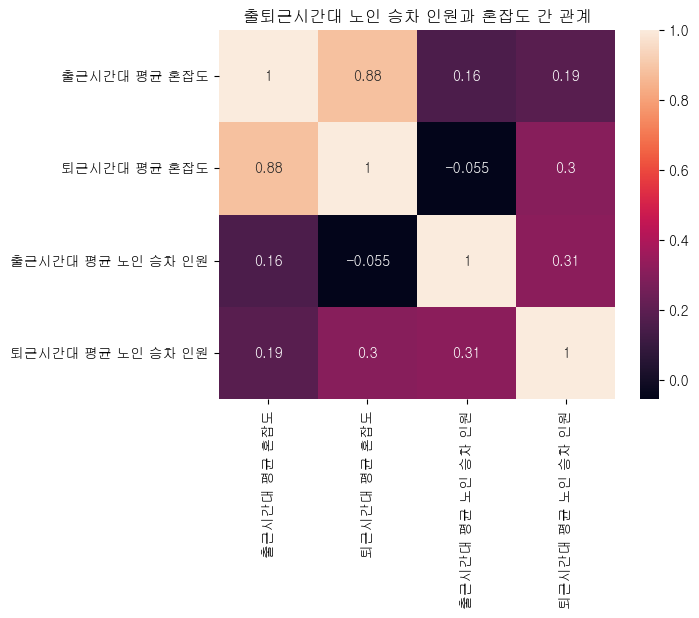

In [48]:
plt.title('출퇴근시간대 노인 승차 인원과 혼잡도 간 관계')
sns.heatmap(sc.corr(), annot=True)


### 출퇴근 시간대 노인 승차 인원과 혼잡도 간 상관계수 히트맵 해석
- 출근시간대에는 0.16으로 유의미한 상관관계가 있다고 보기 어려움
- 퇴근시간대에도 0.3으로 유의미한 상관관계가 있다고 보기 어려움